# Trabalhando com Gráficos



## Importanto a Base de Dados

In [19]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 8))

In [20]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/aluguel_residencial.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados_bairro = dados[selecao]

In [22]:
dados_bairro

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
11,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
12,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,NaN
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22571,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
22572,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
22574,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


## Distribuição de Frequência

In [23]:
# Frequência de Quartos
# 1 e 2
# 3 e 4
# 5 e 6
# 7 ou mais
classes = [0, 2, 4, 6, 15]  # Limites de cada classe

In [24]:
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
22575    (0.0, 2.0]
22576           NaN
22577    (2.0, 4.0]
22578    (0.0, 2.0]
22579    (0.0, 2.0]
Name: Quartos, Length: 22580, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 15]]

In [25]:
pd.value_counts(quartos)

(0, 2]     11814
(2, 4]      9860
(4, 6]       689
(6, 15]       51
Name: Quartos, dtype: int64

In [26]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quartos = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quartos)

1 e 2 quartos        11814
3 e 4 quartos         9860
5 e 6 quartos          689
7 quartos ou mais       51
Name: Quartos, dtype: int64

## Boxplot

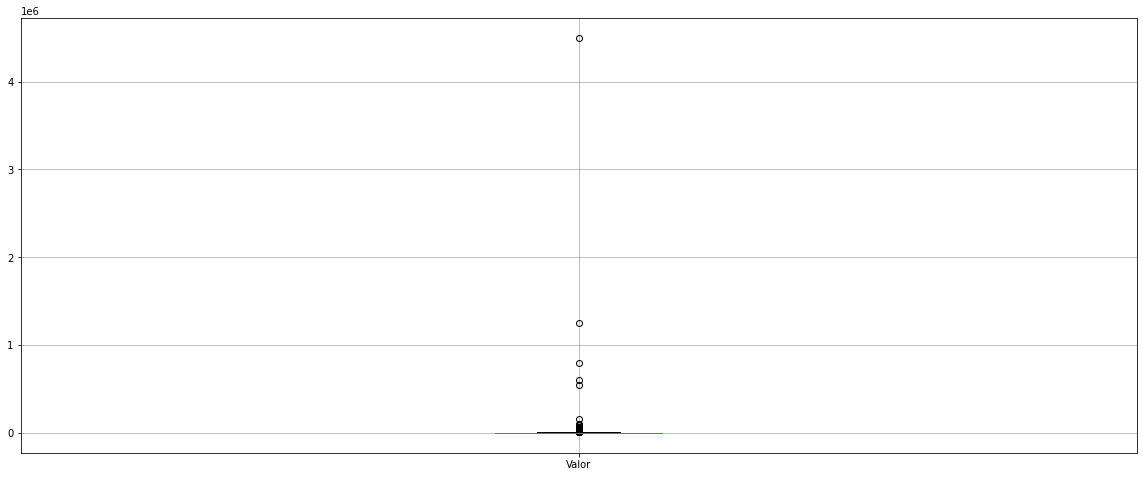

In [27]:
dados.boxplot(['Valor'])

In [28]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN


In [29]:
valor = dados['Valor']

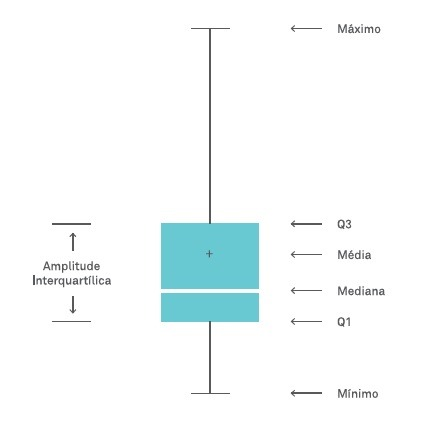

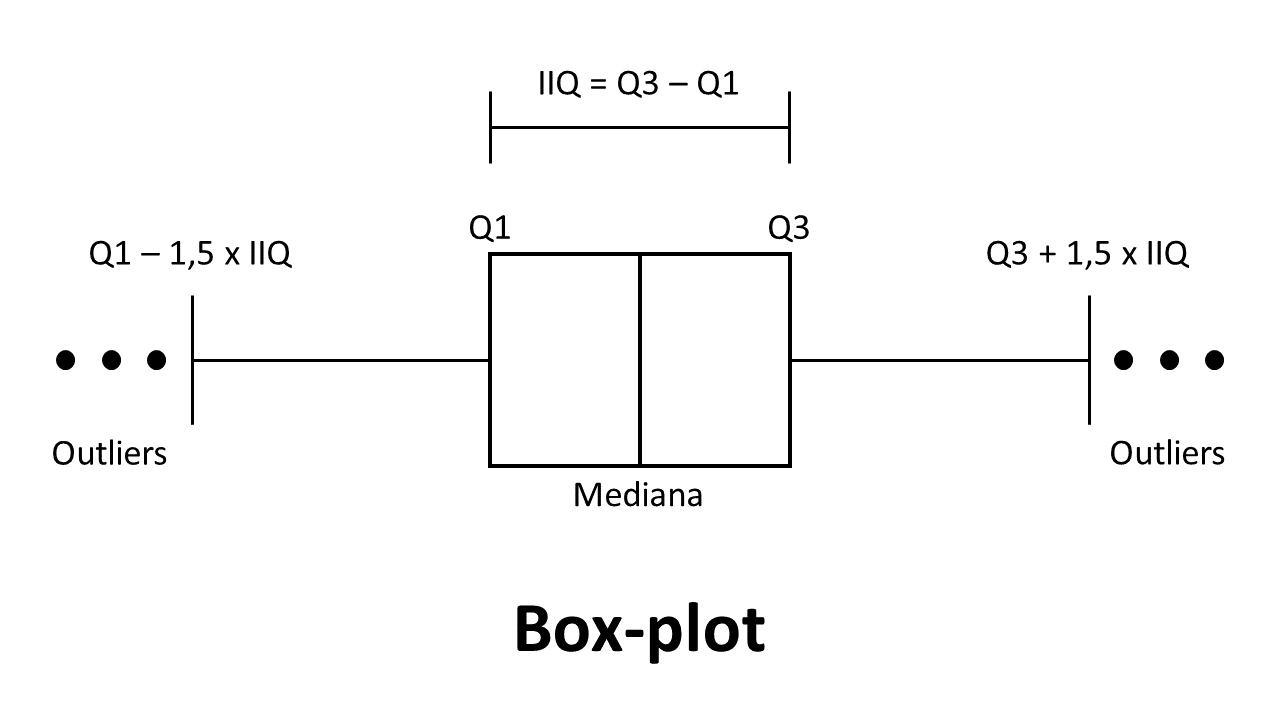

In [30]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [31]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

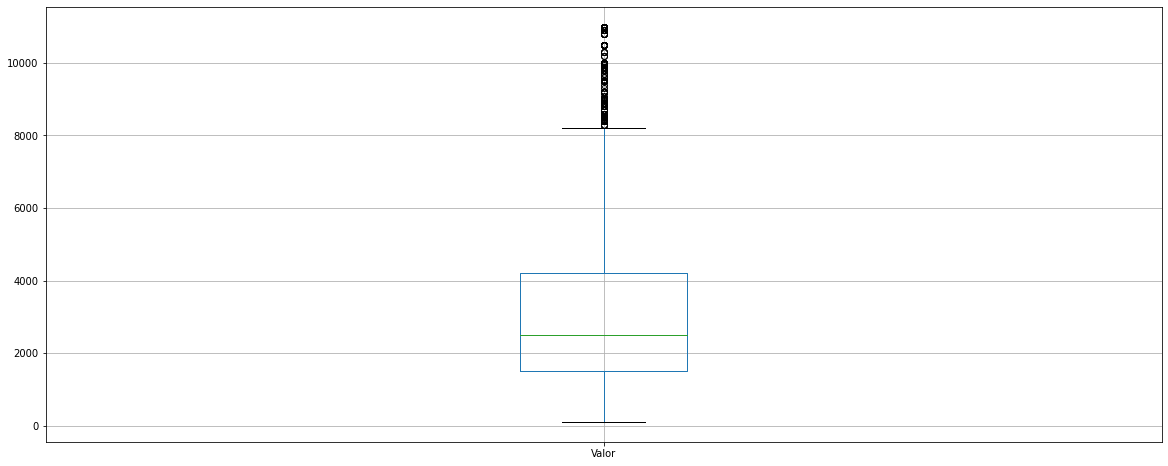

In [32]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4070d83450>]],
      dtype=object)

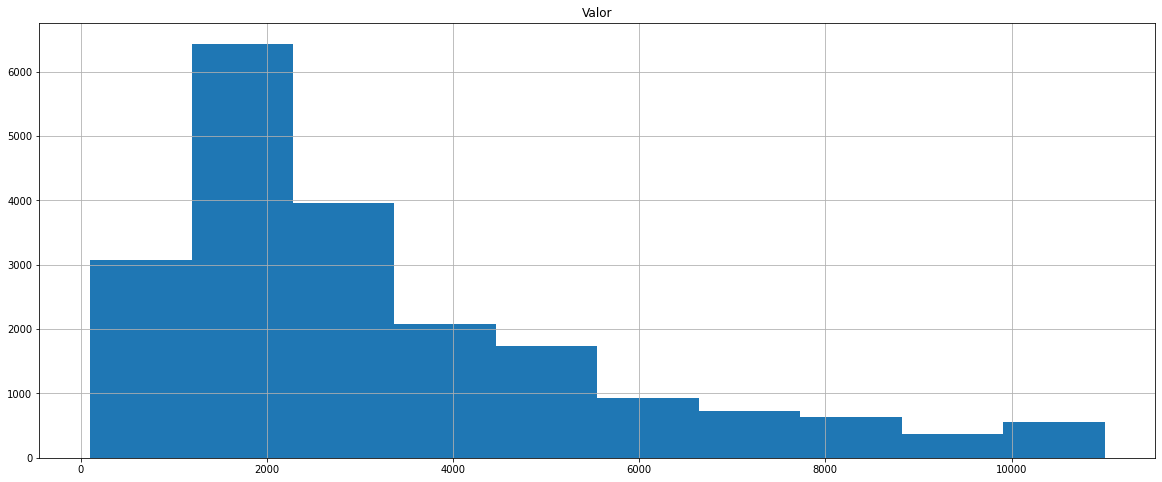

In [34]:
dados_new.hist(['Valor'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


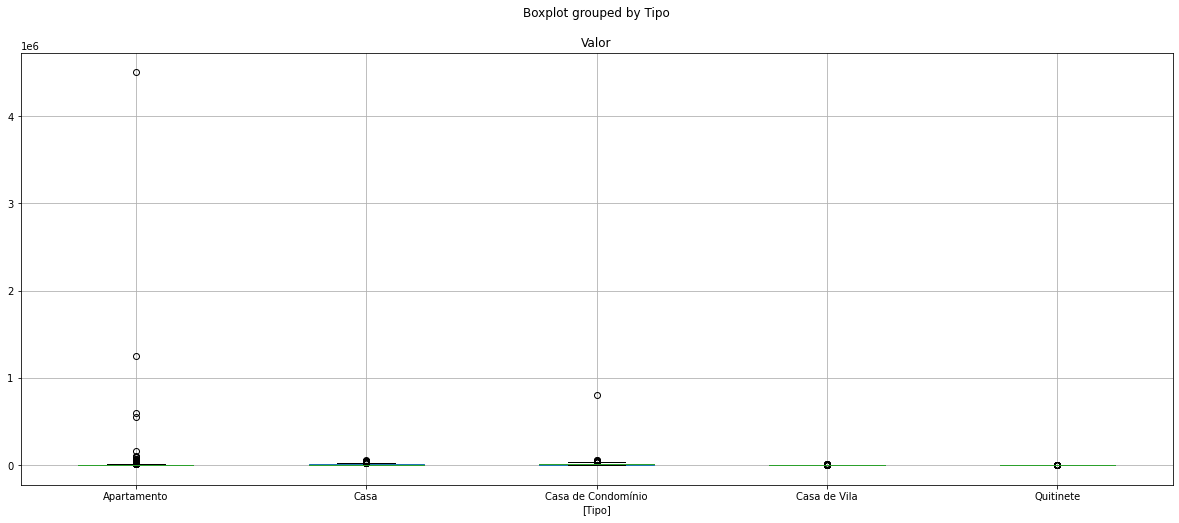

In [35]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [38]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [39]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [40]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [42]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


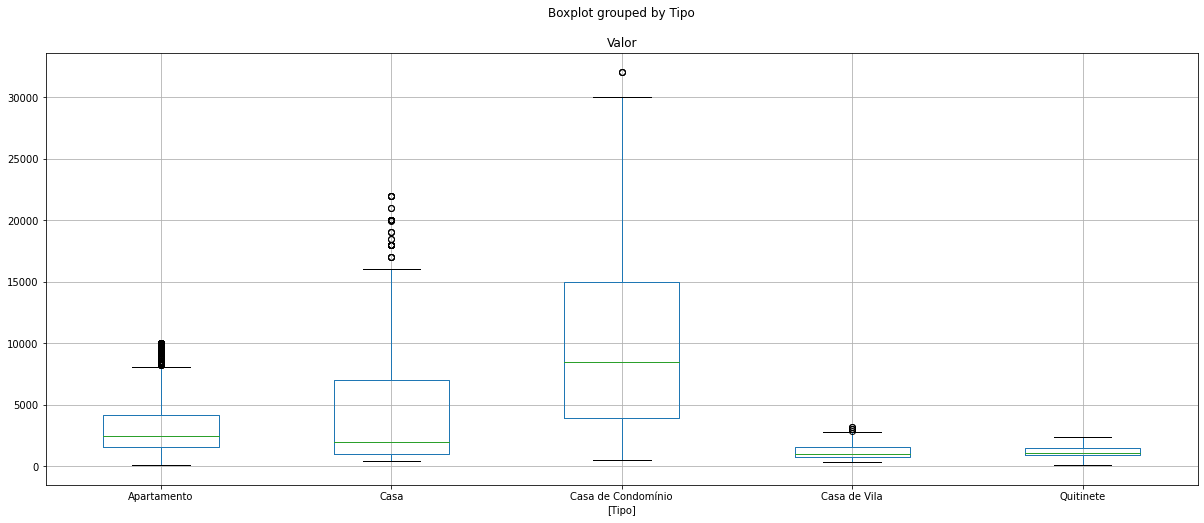

In [43]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [44]:
#dados_new.to_csv('/content/drive/MyDrive/Colab Notebooks/Dados/extras/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

# Gráficos Conjuntos

In [54]:
# Criando figura area
area = plt.figure()

<Figure size 1440x576 with 0 Axes>

In [55]:
g1 = area.add_subplot(2, 2, 1)  # Duas Linhas e Duas Colunas, este gráfico será o primeiro
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [56]:
g1.scatter(dados_new.Valor, dados_new.Area)
g1.set_title('Valor X Área')

g2.hist(dados_new.Valor)
g2.set_title('Histograma')

dados_g3 = dados_new.Valor.sample(100)    # Amostra de 100 dados aleatórios
dados_g3.index = range(dados_g3.shape[0])   # Conserta o index
g3.plot(dados_g3)
g3.set_title('Amostra Valor')

grupo = dados_new.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

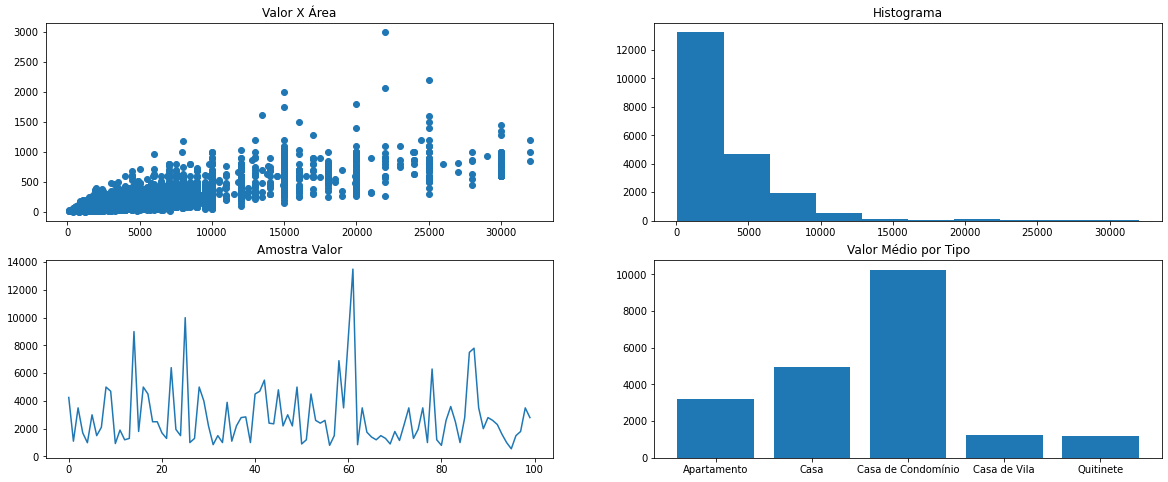

In [57]:
area

In [ ]:
# area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

In [91]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

In [92]:
dados['Tipo Agregado'] = dados['Tipo'].apply(lambda x: 'Casa' if x in casa else 'Apartamento')

In [96]:
area = plt.figure()

<Figure size 1440x576 with 0 Axes>

In [97]:
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

In [98]:
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

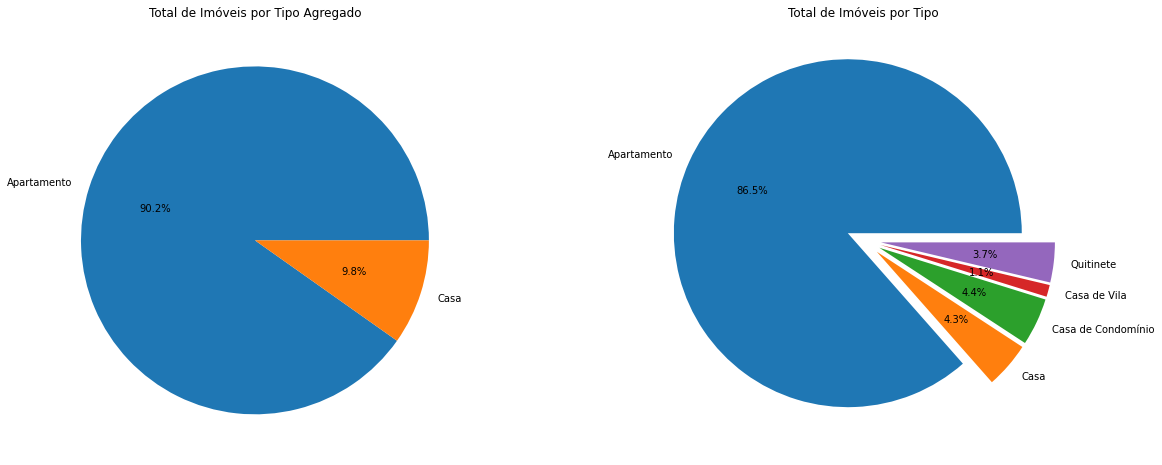

In [99]:
area